In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assumtions So Far

 - We are ignoring diesel, biodiesel, motorhomes, and motorcycles.
 - Ignoring datapoints with no reported income.
 - Assuming each vehicle type is driven equally as far/often
 - Assuming each household continues using the same vehicle types in the same proportions after RUC
 - Assume each hybrid, plug-in hybrid, and EV is a car
 - NOT accounting for vehicle age

In [62]:
"""Source: 2022 National Household Travel Survey https://nhts.ornl.gov/downloads"""
hh = pd.read_csv("hhv2pub.csv")
veh = pd.read_csv("vehv2pub.csv")

In [63]:
incomes = ["Blank","Less than \$10,000","\$10,000 to \$14,999",
"\$15,000 to \$24,999",
"\$25,000 to \$34,999",
"\$35,000 to \$49,999",
"\$50,000 to \$74,999",
"\$75,000 to \$99,999",
"\$100,000 to \$124,999",
"\$125,000 to \$149,999",
"\$150,000 to \$199,999",
"\$200,000 or more"]


def income_category(i):
    return incomes[i]

In [64]:
## Isolate just the variables we care about

veh2 = veh[["HOUSEID","VEHFUEL","VEHTYPE","VEHYEAR"]]
hh2 = hh[["HOUSEID","HHFAMINC"]]

## Join vehicles and households on household ID

plain = veh2.set_index('HOUSEID').join(hh2.set_index('HOUSEID'), on="HOUSEID")
plain

,VEHFUEL,VEHTYPE,VEHYEAR,HHFAMINC
HOUSEID,,,,
9000013002,1,3,2015,11
9000013002,1,3,2019,11
9000013016,1,1,2011,7
9000013039,1,1,2015,7
9000013041,1,1,2014,11
...,...,...,...,...
9000218013,1,3,2018,3
9000218021,1,3,2016,4
9000218034,1,3,2018,4


In [68]:
# Step 1: count actual combinations
counts = plain.groupby(['HHFAMINC', 'VEHFUEL']).size()

In [69]:
# Step 2: make a complete MultiIndex of all combinations
income_levels = sorted(plain['HHFAMINC'].dropna().unique())
fuel_levels   = sorted(plain['VEHFUEL'].dropna().unique())

full_index = pd.MultiIndex.from_product(
    [income_levels, fuel_levels],
    names=['HHFAMINC', 'VEHFUEL']
)

In [70]:
# Step 3: reindex with full grid, filling missing combos with 0
counts = counts.reindex(full_index, fill_value=0)
counts_df = counts.rename('count').reset_index()
counts_df

,HHFAMINC,VEHFUEL,count
0,-8,-9,0
1,-8,1,10
2,-8,2,0
3,-8,3,0
4,-8,4,0
...,...,...,...
99,11,3,1
100,11,4,25
101,11,5,69
102,11,6,87


In [72]:
# Step 4: compute proportions within each income group
counts_df['proportion'] = counts_df.groupby('HHFAMINC')['count'].transform(lambda s: s / s.sum())

# Only keep valid incomes 1 - 11 
prop = counts_df[counts_df['HHFAMINC'].between(1, 11)]
prop

,HHFAMINC,VEHFUEL,count,proportion
16,1,-9,2,0.007168
17,1,1,243,0.870968
18,1,2,6,0.021505
19,1,3,1,0.003584
20,1,4,3,0.010753
...,...,...,...,...
99,11,3,1,0.000532
100,11,4,25,0.013305
101,11,5,69,0.036722
102,11,6,87,0.046301


Text(0, 0.5, 'EV Ownership Rate (%)')

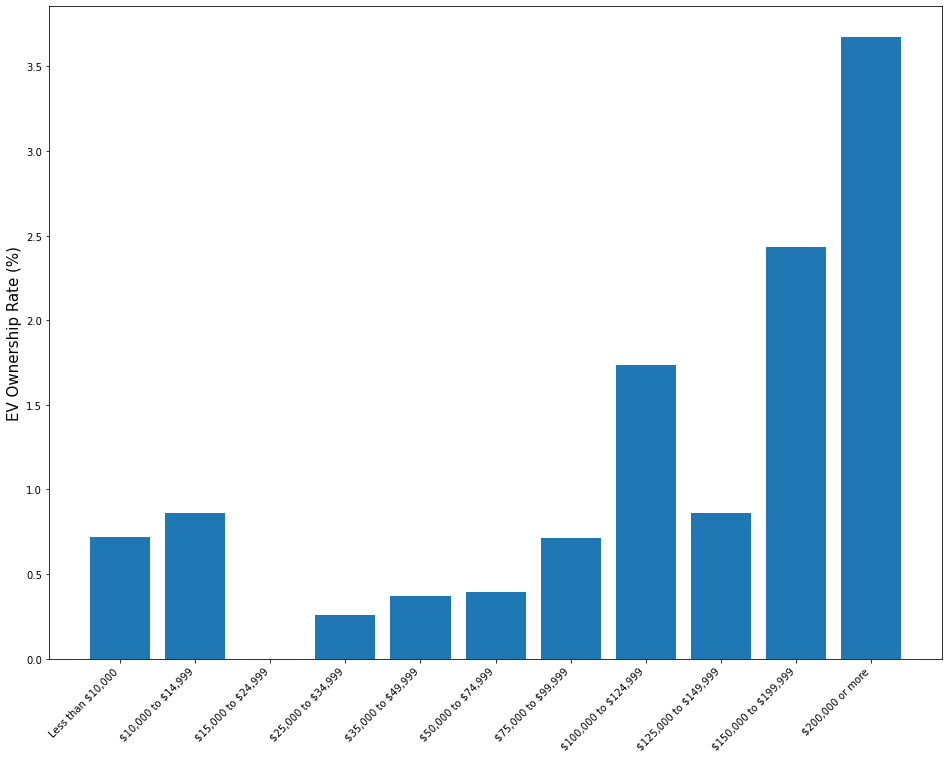

In [73]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45, ha='right')
EV_prop = prop[prop['VEHFUEL'] == 5]
plt.bar(EV_prop['HHFAMINC'].apply(income_category),EV_prop["proportion"]*100)
plt.ylabel("EV Ownership Rate (%)",size=15)

Text(0, 0.5, 'Plug-In Hybrid Ownership Rate (%)')

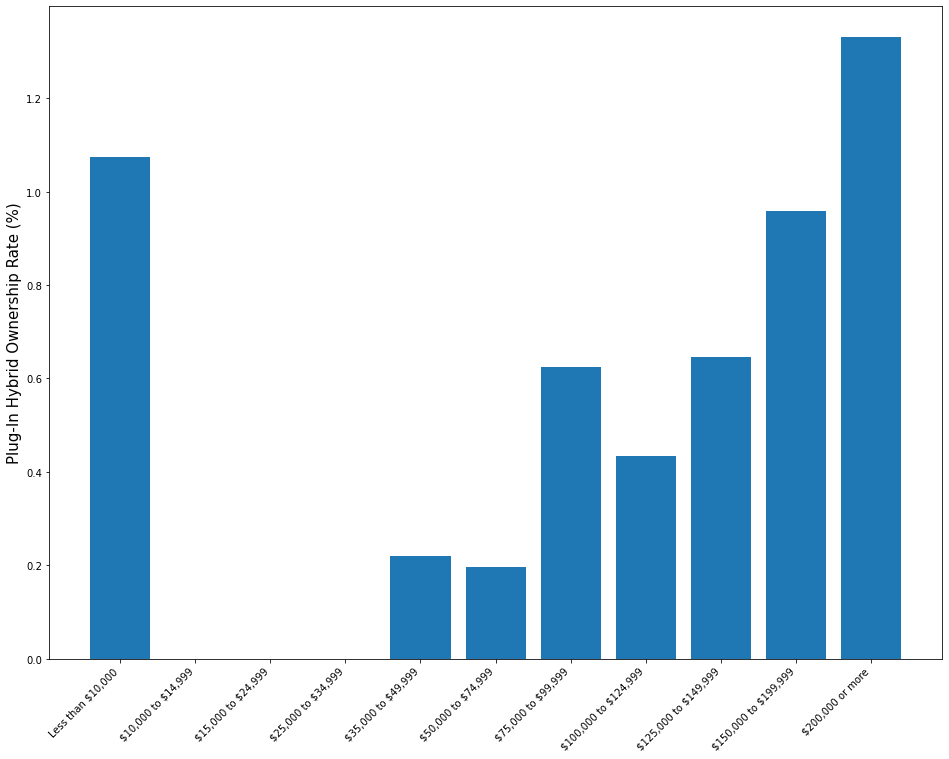

In [74]:
plugin_prop = prop[prop['VEHFUEL'] == 4]
plt.figure(figsize=(16,12))
plt.xticks(rotation=45, ha='right')
plt.bar(plugin_prop['HHFAMINC'].apply(income_category),plugin_prop["proportion"]*100)
plt.ylabel("Plug-In Hybrid Ownership Rate (%)",size=15)

Text(0, 0.5, 'Hybrid Ownership Rate (%)')

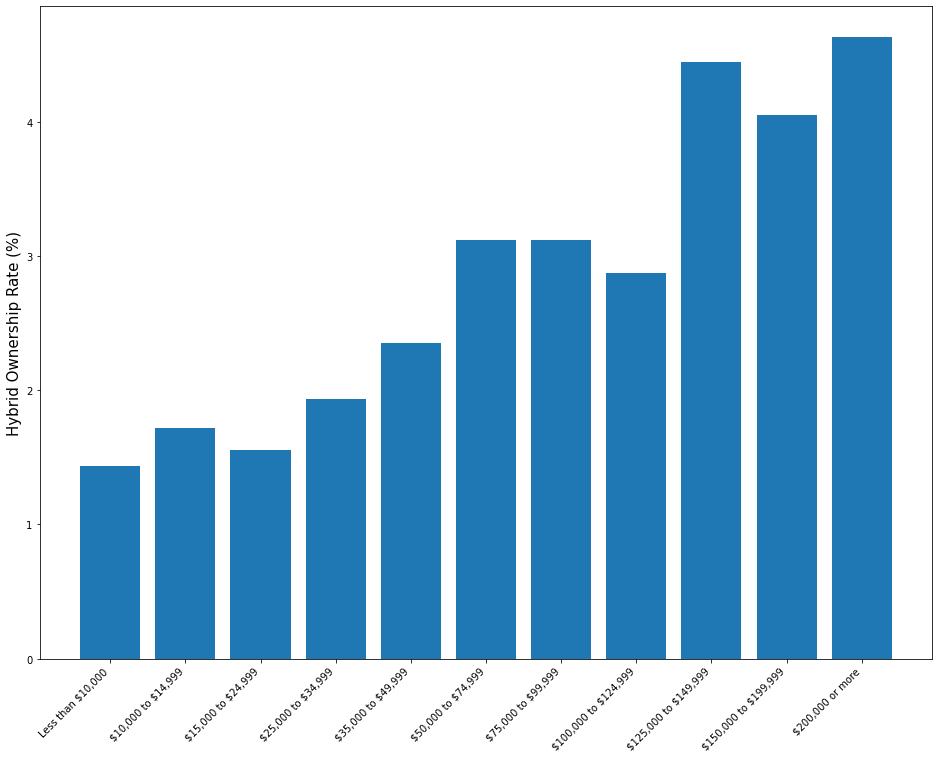

In [75]:
hybrid_prop = prop[prop['VEHFUEL'] == 6]
plt.figure(figsize=(16,12))
plt.xticks(rotation=45, ha='right')
plt.bar(hybrid_prop['HHFAMINC'].apply(income_category),hybrid_prop["proportion"]*100)
plt.ylabel("Hybrid Ownership Rate (%)",size=15)

# Vehicle Types

In [82]:
# Step 1: count actual combinations
counts = plain.groupby(['HHFAMINC', 'VEHTYPE']).size()

# Step 2: make a complete MultiIndex of all combinations
income_levels = sorted(plain['HHFAMINC'].dropna().unique())
fuel_levels   = sorted(plain['VEHTYPE'].dropna().unique())

full_index = pd.MultiIndex.from_product(
    [income_levels, fuel_levels],
    names=['HHFAMINC', 'VEHTYPE']
)

# Step 3: reindex with full grid, filling missing combos with 0
counts = counts.reindex(full_index, fill_value=0)
counts_df = counts.rename('count').reset_index()


# Step 4: compute proportions within each income group
counts_df['proportion'] = counts_df.groupby('HHFAMINC')['count'].transform(lambda s: s / s.sum())

# Only keep valid incomes 1 - 11 
prop = counts_df[counts_df['HHFAMINC'].between(1, 11)]
prop

,HHFAMINC,VEHTYPE,count,proportion
16,1,1,155,0.555556
17,1,2,15,0.053763
18,1,3,46,0.164875
19,1,4,39,0.139785
20,1,5,19,0.068100
...,...,...,...,...
99,11,4,208,0.110697
100,11,5,4,0.002129
101,11,6,15,0.007983
102,11,7,49,0.026078


Text(0, 0.5, 'Van Ownership Rate (%)')

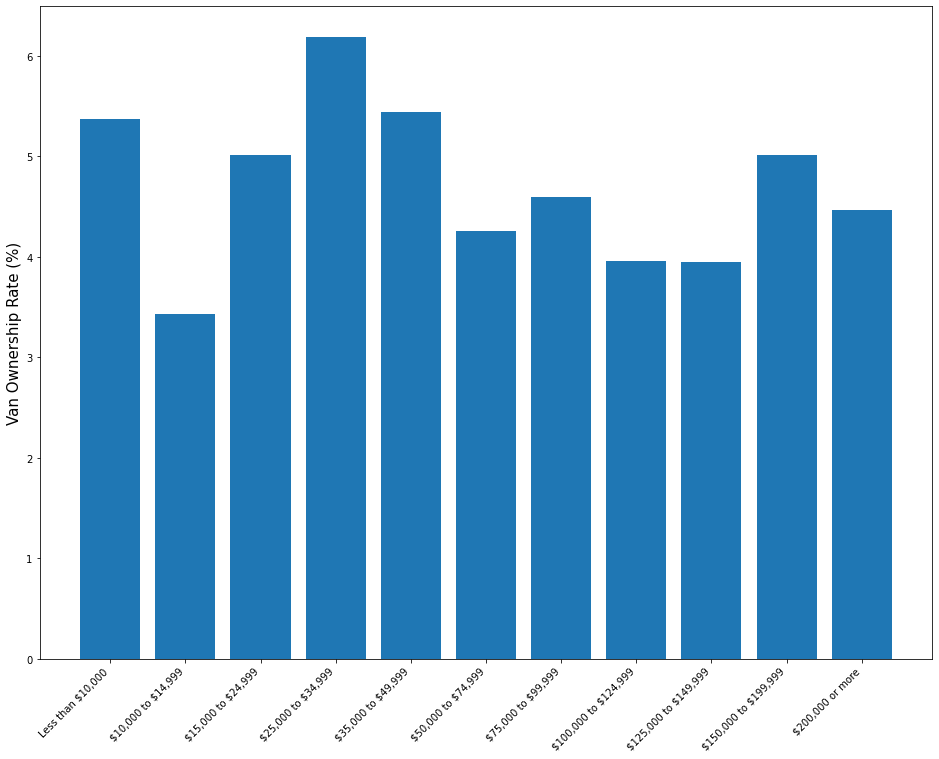

In [83]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45, ha='right')
van_prop = prop[prop['VEHTYPE'] == 2]
plt.bar(van_prop['HHFAMINC'].apply(income_category),van_prop["proportion"]*100)
plt.ylabel("Van Ownership Rate (%)",size=15)

Text(0, 0.5, 'SUV Ownership Rate (%)')

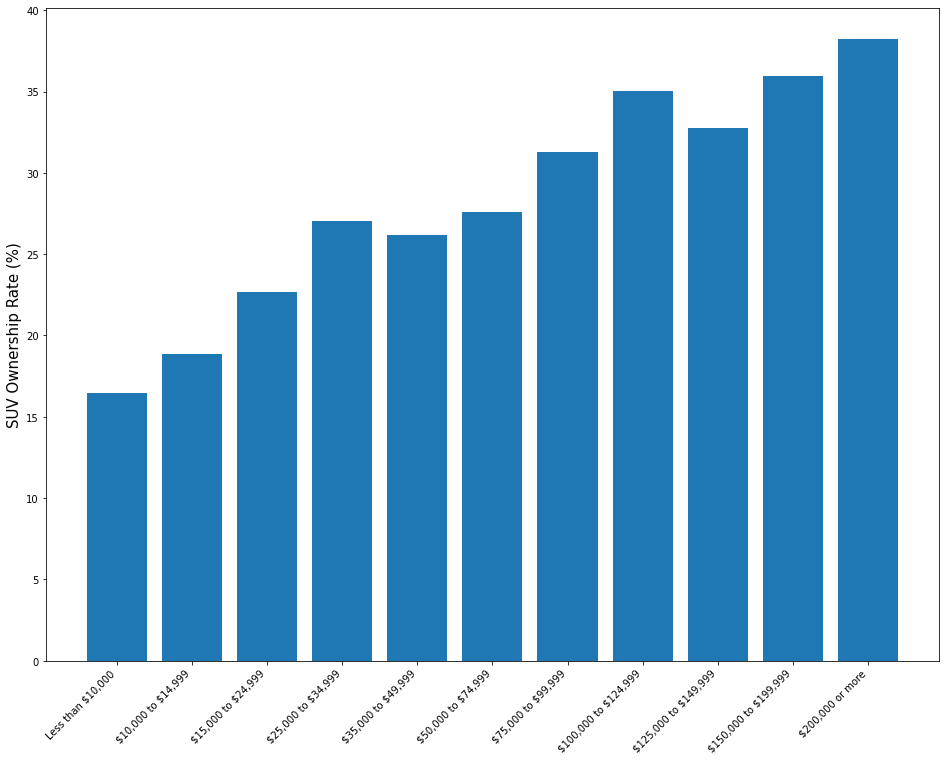

In [84]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45, ha='right')
SUV_prop = prop[prop['VEHTYPE'] == 3]
plt.bar(SUV_prop['HHFAMINC'].apply(income_category),SUV_prop["proportion"]*100)
plt.ylabel("SUV Ownership Rate (%)",size=15)

Text(0, 0.5, 'Pickup Truck Ownership Rate (%)')

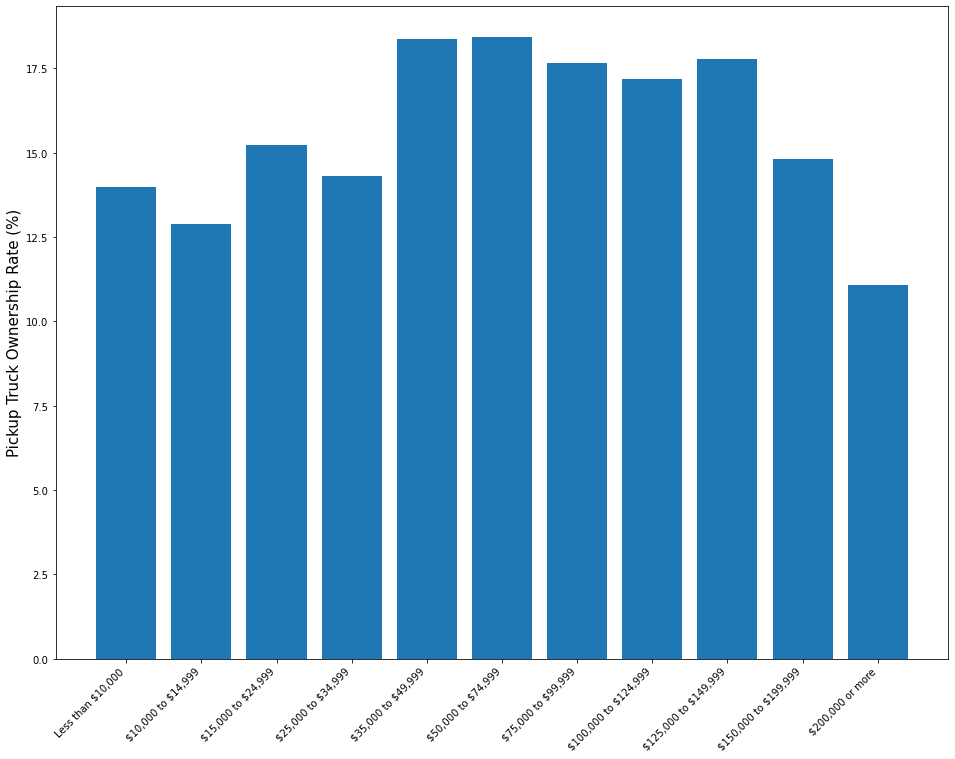

In [93]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45, ha='right')
pickup_prop = prop[prop['VEHTYPE'] == 4]
plt.bar(pickup_prop['HHFAMINC'].apply(income_category),pickup_prop["proportion"]*100)
plt.ylabel("Pickup Truck Ownership Rate (%)",size=15)

# Aggregated

In [94]:
by_income = EV_prop.set_index("HHFAMINC").drop(['VEHFUEL'], axis=1)
by_income.rename(columns={'proportion': 'prop EV','count': 'count EV'}, inplace=True)


by_income['prop plugin hybrid'] = np.array(plugin_prop['proportion'])
by_income['count plugin hybrid'] = np.array(plugin_prop['count'])

by_income['prop hybrid'] = np.array(hybrid_prop['proportion'])
by_income['count hybrid'] = np.array(hybrid_prop['count'])

by_income['prop van'] = np.array(van_prop['proportion'])
by_income['count van'] = np.array(van_prop['count'])

by_income['prop SUV'] = np.array(SUV_prop['proportion'])
by_income['count SUV'] = np.array(SUV_prop['count'])

by_income['prop pickup truck'] = np.array(pickup_prop['proportion'])
by_income['count pickup truck'] = np.array(pickup_prop['count'])

In [95]:
by_income["Total Vehicles"] = (by_income['count pickup truck'] / by_income['prop pickup truck']).astype(int)

In [96]:
by_income = by_income[['Total Vehicles','prop EV', 'count EV', 'prop plugin hybrid', 'count plugin hybrid',
        'prop hybrid', 'count hybrid', 'prop van', 'count van', 'prop SUV',
        'count SUV', 'prop pickup truck', 'count pickup truck']]

In [97]:
by_income

,Total Vehicles,prop EV,count EV,prop plugin hybrid,count plugin hybrid,prop hybrid,count hybrid,prop van,count van,prop SUV,count SUV,prop pickup truck,count pickup truck
HHFAMINC,,,,,,,,,,,,,
1,279,0.007168,2,0.010753,3,0.014337,4,0.053763,15,0.164875,46,0.139785,39
2,233,0.008584,2,0.000000,0,0.017167,4,0.034335,8,0.188841,44,0.128755,30
3,578,0.000000,0,0.000000,0,0.015571,9,0.050173,29,0.226644,131,0.152249,88
4,776,0.002577,2,0.000000,0,0.019330,15,0.061856,48,0.270619,210,0.143041,111
5,1360,0.003676,5,0.002206,3,0.023529,32,0.054412,74,0.261765,356,0.183824,250
6,2535,0.003945,10,0.001972,5,0.031164,79,0.042604,108,0.276134,700,0.184221,467
7,2242,0.007136,16,0.006244,14,0.031222,70,0.045941,103,0.313113,702,0.176628,396
8,1844,0.017354,32,0.004338,8,0.028742,53,0.039588,73,0.350325,646,0.171909,317
9,1394,0.008608,12,0.006456,9,0.044476,62,0.039455,55,0.327834,457,0.177905,248


In [98]:
### Add in plain gas cars

gas_cars = plain[(plain["VEHFUEL"] == 1) & (plain["VEHTYPE"] == 1)].groupby("HHFAMINC").count().drop([-8,-7])["VEHFUEL"]
by_income["count gas cars"] = gas_cars
by_income

,Total Vehicles,prop EV,count EV,prop plugin hybrid,count plugin hybrid,prop hybrid,count hybrid,prop van,count van,prop SUV,count SUV,prop pickup truck,count pickup truck,count gas cars
HHFAMINC,,,,,,,,,,,,,,
1,279,0.007168,2,0.010753,3,0.014337,4,0.053763,15,0.164875,46,0.139785,39,144
2,233,0.008584,2,0.000000,0,0.017167,4,0.034335,8,0.188841,44,0.128755,30,128
3,578,0.000000,0,0.000000,0,0.015571,9,0.050173,29,0.226644,131,0.152249,88,301
4,776,0.002577,2,0.000000,0,0.019330,15,0.061856,48,0.270619,210,0.143041,111,368
5,1360,0.003676,5,0.002206,3,0.023529,32,0.054412,74,0.261765,356,0.183824,250,575
6,2535,0.003945,10,0.001972,5,0.031164,79,0.042604,108,0.276134,700,0.184221,467,1058
7,2242,0.007136,16,0.006244,14,0.031222,70,0.045941,103,0.313113,702,0.176628,396,868
8,1844,0.017354,32,0.004338,8,0.028742,53,0.039588,73,0.350325,646,0.171909,317,650
9,1394,0.008608,12,0.006456,9,0.044476,62,0.039455,55,0.327834,457,0.177905,248,500


In [99]:
### Refactor to make the proportions out of total number of vehicles included (excluding motorcycles, RVs etc.)

by_income["Total Vehicles Included"] = by_income["count EV"] + by_income["count plugin hybrid"] + by_income["count hybrid"] + by_income["count van"] + by_income["count SUV"] + by_income["count pickup truck"] + by_income["count gas cars"]

veh_types = ["EV","plugin hybrid","hybrid","van","SUV","pickup truck","gas cars"]

df = pd.DataFrame()
for i in veh_types:
    df[i] = by_income[f"count {i}"]/by_income["Total Vehicles Included"]

df

,EV,plugin hybrid,hybrid,van,SUV,pickup truck,gas cars
HHFAMINC,,,,,,,
1,0.007905,0.011858,0.015810,0.059289,0.181818,0.154150,0.569170
2,0.009259,0.000000,0.018519,0.037037,0.203704,0.138889,0.592593
3,0.000000,0.000000,0.016129,0.051971,0.234767,0.157706,0.539427
4,0.002653,0.000000,0.019894,0.063660,0.278515,0.147215,0.488064
5,0.003861,0.002317,0.024710,0.057143,0.274903,0.193050,0.444015
6,0.004120,0.002060,0.032550,0.044499,0.288422,0.192419,0.435929
7,0.007377,0.006455,0.032273,0.047487,0.323651,0.182573,0.400184
8,0.017988,0.004497,0.029792,0.041034,0.363125,0.178190,0.365374
9,0.008935,0.006701,0.046165,0.040953,0.340283,0.184661,0.372301


# Fuel Economy Data Cleaning

In [100]:
""" Data Source: https://www.epa.gov/automotive-trends/explore-automotive-trends-data#DetailedData """

mpg = pd.read_csv("table_export.csv")

In [113]:
mpg

,Model Year,Regulatory Class,Vehicle Type,Production Share,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.)
0,1975,All,All,1.000000,13.05970,12.01552,14.61167,680.59612,739.73800,608.31160,4060.399,137.3346,-
1,1975,Car,All Car,0.806646,13.45483,12.31413,15.17266,660.63740,721.82935,585.84724,4057.494,136.1964,-
2,1975,Car,Sedan/Wagon,0.805645,13.45833,12.31742,15.17643,660.46603,721.63673,585.70185,4057.565,136.2256,-
3,1975,Truck,All Truck,0.193354,11.63431,10.91165,12.65900,763.86134,814.45060,702.03002,4072.518,142.0826,-
4,1975,Truck,Pickup,0.131322,11.91476,11.07827,13.12613,745.88139,802.20090,677.04643,4011.977,140.9365,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Prelim. 2024,All,All,-,27.96500,25.09815,30.60087,305.40889,341.59863,278.11420,4419.473,266.6851,51.61607
396,Prelim. 2024,Truck,Minivan/Van,-,26.29519,22.74947,29.79890,332.37341,383.27762,293.97200,4736.531,260.6638,57.04549
397,Prelim. 2024,Truck,Truck SUV,-,25.95934,23.42193,28.26972,332.70975,368.52787,305.68907,4577.821,264.8282,50.22476
398,Prelim. 2024,Truck,All Truck,-,24.60905,22.12403,26.88731,352.70553,392.50003,322.68511,4774.982,284.0950,54.02956


In [114]:
### Get average MPG by vehicle type
data_mpg = mpg.groupby("Vehicle Type")["Real-World MPG"].mean().to_dict()
data_mpg

{'All': 21.302117199999998,
 'All Car': 24.299770600000002,
 'All Truck': 18.019150399999997,
 'Car SUV': 21.0537626,
 'Minivan/Van': 18.7710222,
 'Pickup': 17.2430812,
 'Sedan/Wagon': 24.513911800000002,
 'Truck SUV': 17.7535464}

In [144]:
avg_mpg = {}
avg_mpg["EV"] = np.inf
avg_mpg["plugin hybrid"] = 100
avg_mpg["hybrid"] = 50
avg_mpg["van"] = data_mpg["Minivan/Van"]
avg_mpg["SUV"] = data_mpg["Car SUV"]
avg_mpg["pickup truck"] = data_mpg["Pickup"]
avg_mpg["gas cars"] = data_mpg["All Car"]


# Use GPM instead of MPG so that EVs can have a 0 value instead of infinite MPG which breaks calculations
avg_gpm = 1/pd.Series(avg_mpg)
avg_gpm

EV               0.000000
plugin hybrid    0.010000
hybrid           0.020000
van              0.053274
SUV              0.047497
pickup truck     0.057994
gas cars         0.041153
dtype: float64

In [145]:
# Get the expected gallons per mile for each income group by taking the proportion of each vehicle/fuel type 
# for each income group and multiplying it by its respective GPM
expected_GPM = df.dot(avg_gpm)
expected_GPM

HHFAMINC
1     0.044592
2     0.044460
3     0.045587
4     0.045641
5     0.046087
6     0.045840
7     0.045669
8     0.045444
9     0.045365
10    0.044475
11    0.043107
dtype: float64

In [117]:
CA_gas_tax = 0.612 ## $ per gallon
tax_per_mile = CA_gas_tax * expected_GPM ### ($/gal) * (gal/mi) = ($/mi)
tax_per_mile

HHFAMINC
1     0.027290
2     0.027210
3     0.027899
4     0.027932
5     0.028205
6     0.028054
7     0.027950
8     0.027812
9     0.027763
10    0.027219
11    0.026382
dtype: float64

# Add vehicle year

In [146]:
eff_year = mpg.groupby("Model Year")["Real-World MPG"].mean()

Text(0.5, 1.0, 'Average Fuel Efficiency by Year')

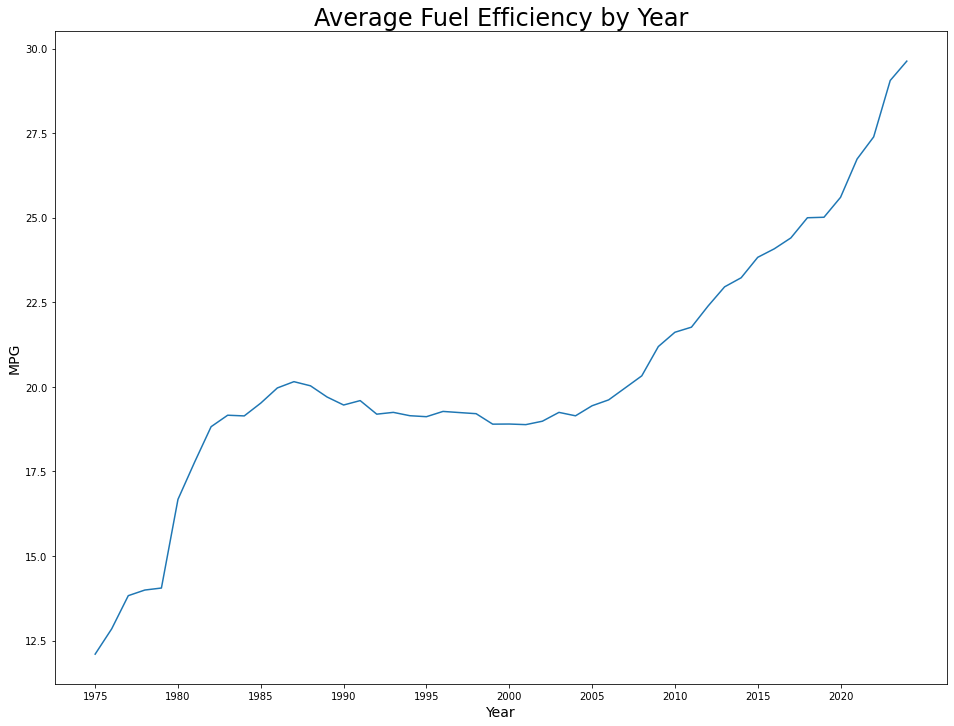

In [147]:
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(eff_year.index.values, eff_year.values)
desired_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

# Set the x-axis tick locations
ax.set_xticks(desired_ticks)
plt.ylabel("MPG", size=14)
plt.xlabel("Year", size=14)
plt.title("Average Fuel Efficiency by Year", size=24)

In [148]:
## Only take vehicle and fuel types we are interested in: cars, vans, SUVs, pickups, EVs, hybrids, etc.
plain = plain[plain["VEHFUEL"].isin([1,4,5,6])]
plain = plain[plain["VEHTYPE"].isin([1,2,3,4])]
plain

,VEHFUEL,VEHTYPE,VEHYEAR,HHFAMINC,GPM
HOUSEID,,,,,
9000013002,1,3,2015,11,0.039777
9000013002,1,3,2019,11,0.036363
9000013016,1,1,2011,7,0.039388
9000013039,1,1,2015,7,0.035411
9000013041,1,1,2014,11,0.036197
...,...,...,...,...,...
9000218013,1,3,2018,3,0.036557
9000218021,1,3,2016,4,0.038159
9000218034,1,3,2018,4,0.036557


In [131]:
type_map = {1:"All Car",2:"Minivan/Van",3:"Car SUV",4:"Pickup"}

### function to get the GPM using a combination of vehicle year, type, and fueltype. 
def get_gpm(row):
    
    ## If plug-in hybrid, 1/100 GPM (100 MPG)
    if row["VEHFUEL"] == 4:
        return (1/100)
    
    ## If EV, 0 GPM (infinite MPG)
    if row["VEHFUEL"] == 5:
        return 0
    
    ## If hybrid,  1/50 GPM (50 MPG)
    if row["VEHFUEL"] == 6:
        return (1/50)
    
    ## Else, account for combination of vehicle type and vehicle year
    fig = mpg[(mpg["Vehicle Type"] == type_map[row["VEHTYPE"]]) & (mpg["Model Year"] == str(row["VEHYEAR"]))]
    return 1/fig["Real-World MPG"].iloc[0]

In [132]:
plain["GPM"] = plain.apply(get_gpm,axis=1)

In [133]:
plain.groupby("HHFAMINC").mean()

,VEHFUEL,VEHTYPE,VEHYEAR,GPM
HHFAMINC,,,,
-8,1.000000,1.875000,2004.375000,0.046295
-7,1.232432,2.205405,2012.340541,0.040802
1,1.149194,1.858871,2007.443548,0.042869
2,1.112676,1.845070,2007.525822,0.043510
3,1.082117,1.965328,2008.653285,0.043373
4,1.106613,2.048583,2010.105263,0.042689
5,1.141487,2.151079,2010.628297,0.042666
6,1.185987,2.168577,2011.801699,0.041631
7,1.215649,2.224714,2012.076336,0.041176


In [134]:
averages = plain[plain["HHFAMINC"]>0][["VEHYEAR","GPM","HHFAMINC"]].groupby("HHFAMINC").mean()
averages["Tax per mile"] = averages["GPM"]*CA_gas_tax*100

In [135]:
average_tax = np.mean(averages["Tax per mile"])
averages["increased_tax"] = average_tax - averages["Tax per mile"]
averages

,VEHYEAR,GPM,Tax per mile,increased_tax
HHFAMINC,,,,
1,2007.443548,0.042869,2.623599,-0.092592
2,2007.525822,0.043510,2.662813,-0.131807
3,2008.653285,0.043373,2.654441,-0.123434
4,2010.105263,0.042689,2.612578,-0.081571
5,2010.628297,0.042666,2.611174,-0.080167
6,2011.801699,0.041631,2.547841,-0.016834
7,2012.076336,0.041176,2.519952,0.011054
8,2013.224430,0.040316,2.467329,0.063678
9,2013.014949,0.040277,2.464971,0.066036


In [136]:
averages.rename(columns={"VEHYEAR":"Average Vehicle Year","GPM":"Average Gallons per Mile","Tax per mile":"Current Tax (Cents/Mile)","increased_tax":"Change in Tax Under RUC (Cents/Mile)"},inplace=True)
averages = averages.reset_index()
averages = averages.drop("HHFAMINC",axis=1)
averages["Income"] = incomes[1:]
averages = averages.set_index("Income")
averages["Change Paid Per Year ($)"] = averages["Change in Tax Under RUC (Cents/Mile)"]*10000/100

In [137]:
averages

,Average Vehicle Year,Average Gallons per Mile,Current Tax (Cents/Mile),Change in Tax Under RUC (Cents/Mile),Change Paid Per Year ($)
Income,,,,,
"Less than \$10,000",2007.443548,0.042869,2.623599,-0.092592,-9.259234
"\$10,000 to \$14,999",2007.525822,0.043510,2.662813,-0.131807,-13.180670
"\$15,000 to \$24,999",2008.653285,0.043373,2.654441,-0.123434,-12.343417
"\$25,000 to \$34,999",2010.105263,0.042689,2.612578,-0.081571,-8.157100
"\$35,000 to \$49,999",2010.628297,0.042666,2.611174,-0.080167,-8.016714
"\$50,000 to \$74,999",2011.801699,0.041631,2.547841,-0.016834,-1.683433
"\$75,000 to \$99,999",2012.076336,0.041176,2.519952,0.011054,1.105428
"\$100,000 to \$124,999",2013.224430,0.040316,2.467329,0.063678,6.367774
"\$125,000 to \$149,999",2013.014949,0.040277,2.464971,0.066036,6.603559


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

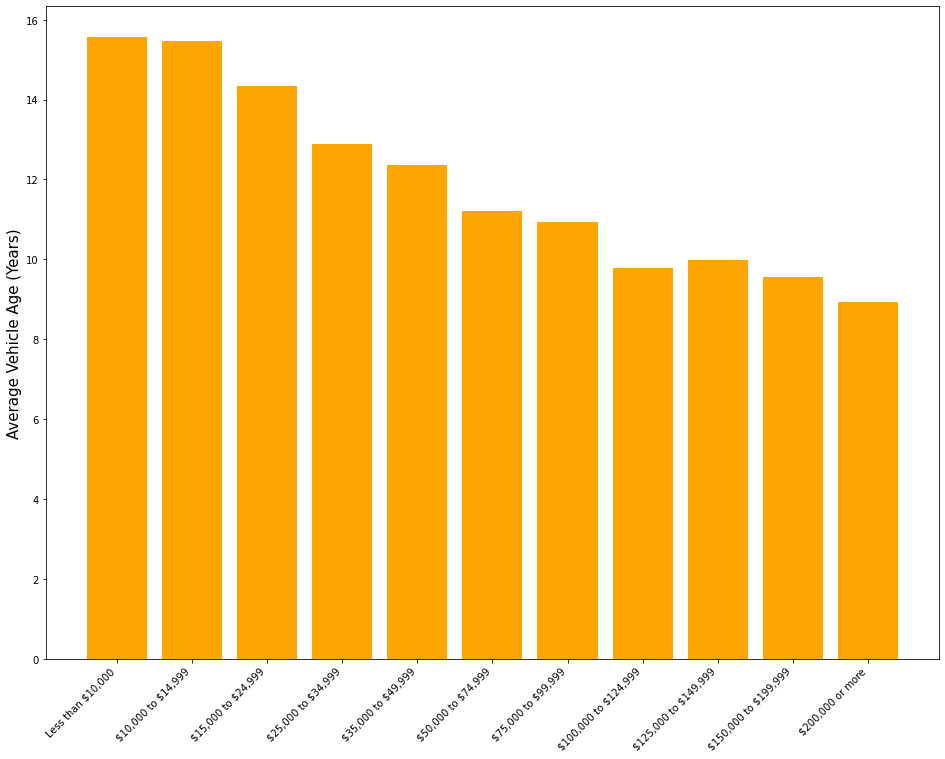

In [138]:
values = 2023 - averages["Average Vehicle Year"]
plt.figure(figsize=(16, 12)) # Optional: set figure size
plot = plt.bar(averages.index, values, color=['orange' if v >= 0 else 'skyblue' for v in values])
plt.ylabel("Average Vehicle Age (Years)",size=15)
plt.xticks(rotation=45, ha='right')

In [139]:
from ipywidgets import interact


def plot(RUC=average_tax):
    values = (RUC - averages["Current Tax (Cents/Mile)"])*100
    plt.figure(figsize=(16, 12)) # Optional: set figure size
    plot = plt.bar(averages.index, values, color=['salmon' if v >= 0 else 'skyblue' for v in values])
    plt.ylabel("Annual Change in Tax ($)",size=15)
    plt.xticks(rotation=45, ha='right')

interact(plot, RUC=(1.0, 5.0, 0.1));


interactive(children=(FloatSlider(value=2.5310066052223816, description='RUC', max=5.0, min=1.0), Output()), _…

# Not accounting for vehicle age

In [140]:
ageless = np.mean(tax_per_mile) - tax_per_mile

HHFAMINC
1      3.203659
2      4.008368
3     -2.886470
4     -3.215532
5     -5.946564
6     -4.437152
7     -3.389915
8     -2.014275
9     -1.528270
10     3.917196
11    12.288956
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

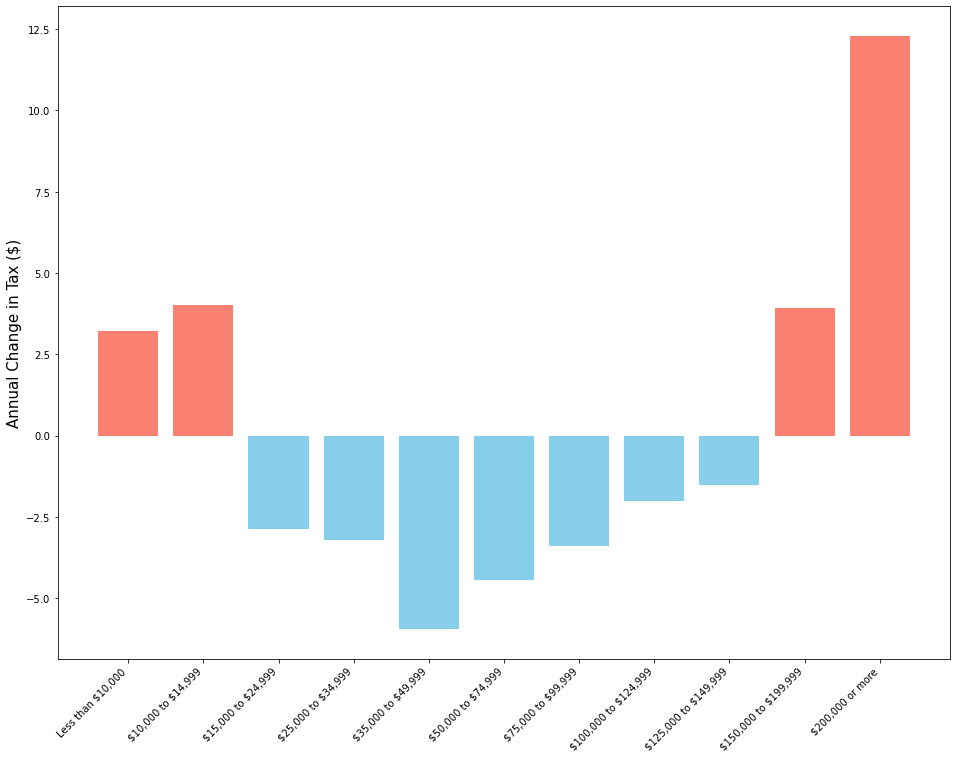

In [141]:
plt.figure(figsize=(16, 12)) # Optional: set figure size
plot = plt.bar(incomes[1:], ageless*10000, color=['salmon' if v >= 0 else 'skyblue' for v in ageless])
plt.ylabel("Annual Change in Tax ($)",size=15)
plt.xticks(rotation=45, ha='right')